<a href="https://colab.research.google.com/github/gopalkalpande/Practice-AI/blob/master/time_series_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas_datareader.data as web

In [0]:
stock_name = 'INFY'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018,12,31)
data = web.DataReader(stock_name, "yahoo", start, end)
data.drop(['Volume', 'Adj Close'], 1, inplace=True)

In [16]:

print(data.head())
print('\n Data Types:')
print(data.dtypes)

               High      Low     Open    Close
Date                                          
2013-01-02  5.44500  5.32000  5.43625  5.35750
2013-01-03  5.47875  5.36375  5.38250  5.43375
2013-01-04  5.36750  5.29250  5.36750  5.33500
2013-01-07  5.41500  5.33500  5.33750  5.41125
2013-01-08  5.35000  5.30375  5.31125  5.31500

 Data Types:
High     float64
Low      float64
Open     float64
Close    float64
dtype: object


In [17]:
data.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1510, freq=None)

In [18]:
ts['2013-01-01':'2017-09-01']

NameError: ignored

In [20]:
ts = data['Close'] 
ts.head(10)



Date
2013-01-02    5.35750
2013-01-03    5.43375
2013-01-04    5.33500
2013-01-07    5.41125
2013-01-08    5.31500
2013-01-09    5.33500
2013-01-10    5.49375
2013-01-11    6.52750
2013-01-14    6.49125
2013-01-15    6.37500
Name: Close, dtype: float64

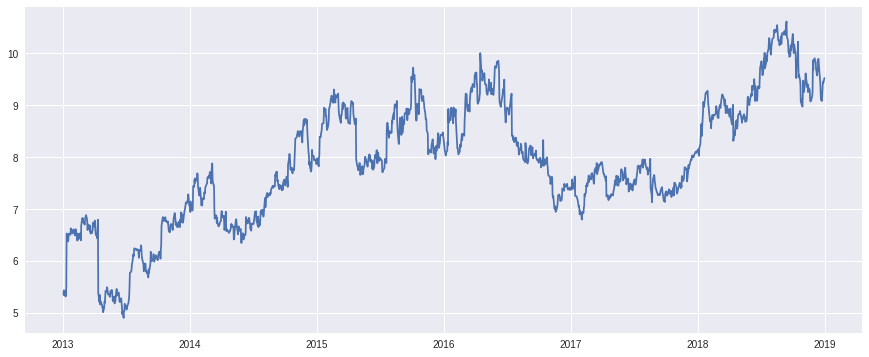

In [21]:
plt.plot(ts)

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


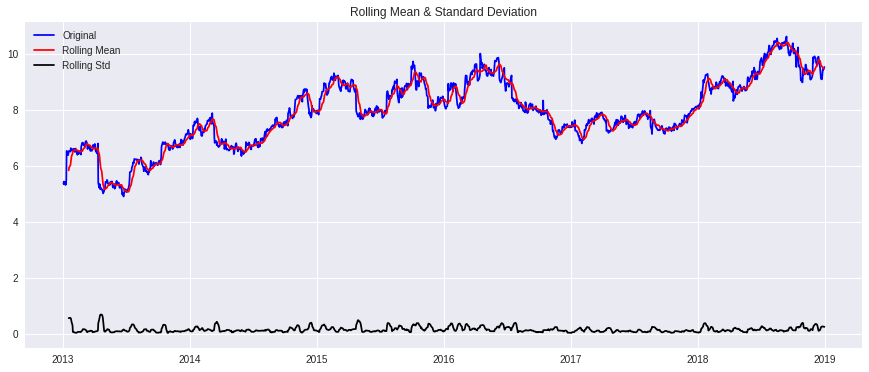

Results of Dickey-Fuller Test:
Test Statistic                   -2.467311
p-value                           0.123632
#Lags Used                        0.000000
Number of Observations Used    1509.000000
Critical Value (1%)              -3.434691
Critical Value (5%)              -2.863457
Critical Value (10%)             -2.567791
dtype: float64


In [25]:
test_stationarity(ts)

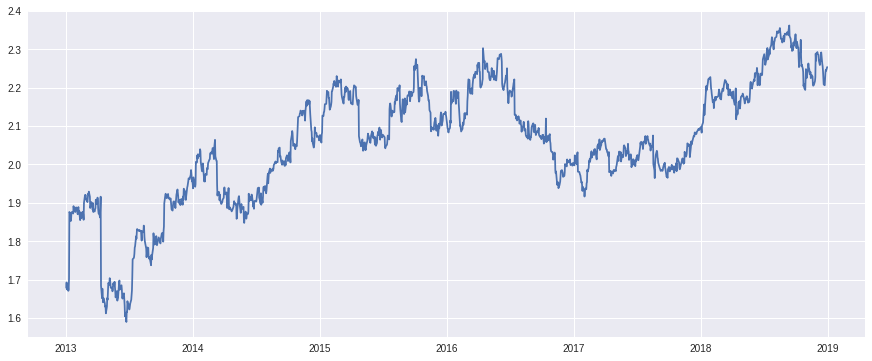

In [26]:
# ESTIMATING AND ELEMINATING TREND 

ts_log = np.log(ts)
plt.plot(ts_log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


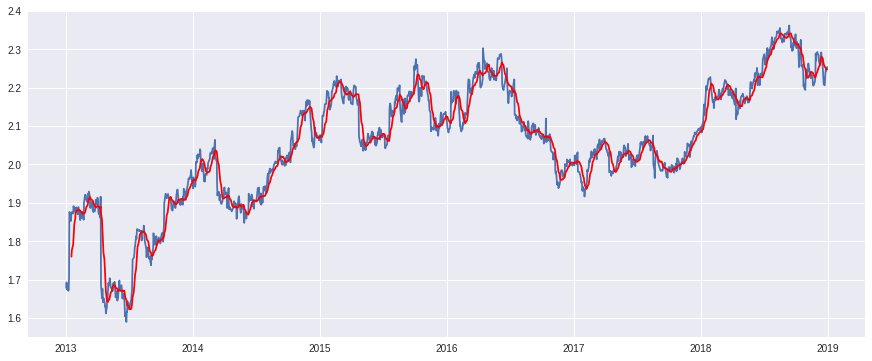

In [27]:
# moving average

moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [29]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
2013-01-09         NaN
2013-01-10         NaN
2013-01-11         NaN
2013-01-14         NaN
2013-01-15         NaN
2013-01-16         NaN
2013-01-17    0.114772
Name: Close, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


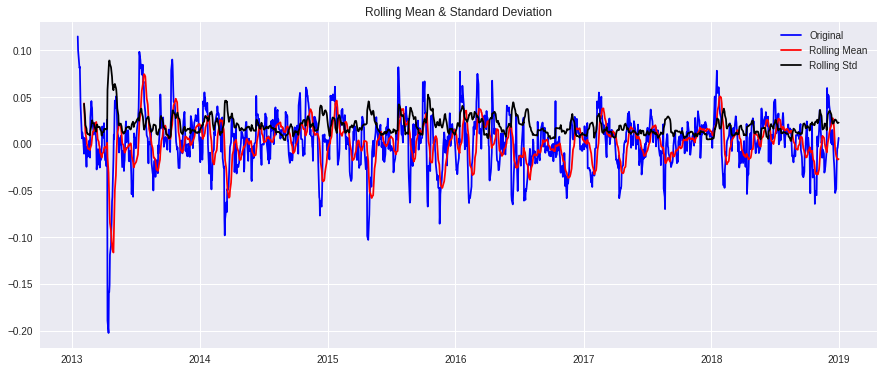

Results of Dickey-Fuller Test:
Test Statistic                -1.206368e+01
p-value                        2.436404e-22
#Lags Used                     7.000000e+00
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64


In [30]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


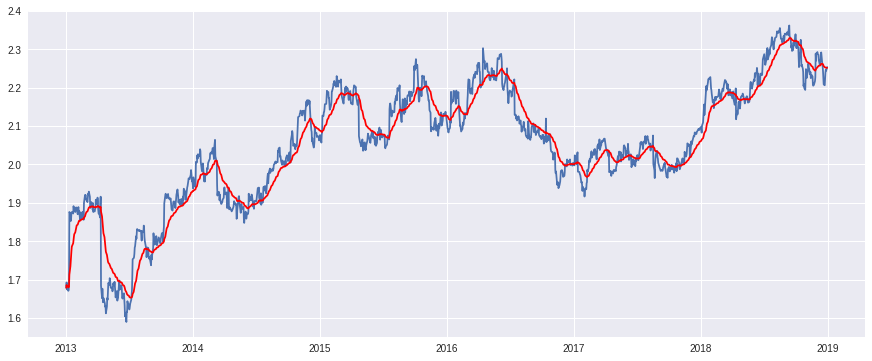

In [31]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


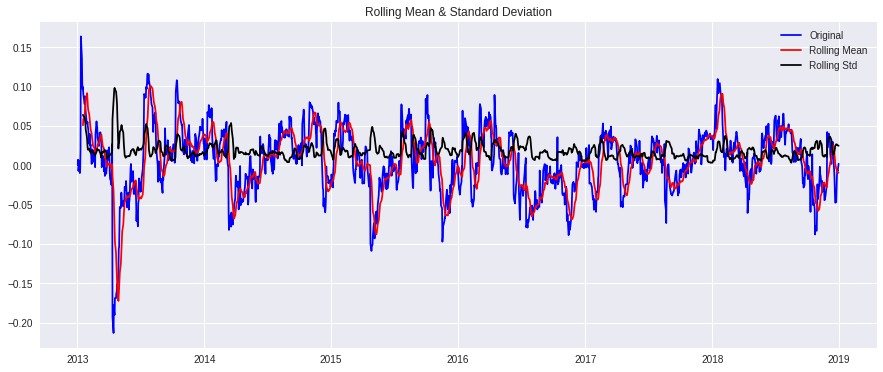

Results of Dickey-Fuller Test:
Test Statistic                -7.799667e+00
p-value                        7.552215e-12
#Lags Used                     0.000000e+00
Number of Observations Used    1.509000e+03
Critical Value (1%)           -3.434691e+00
Critical Value (5%)           -2.863457e+00
Critical Value (10%)          -2.567791e+00
dtype: float64


In [32]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

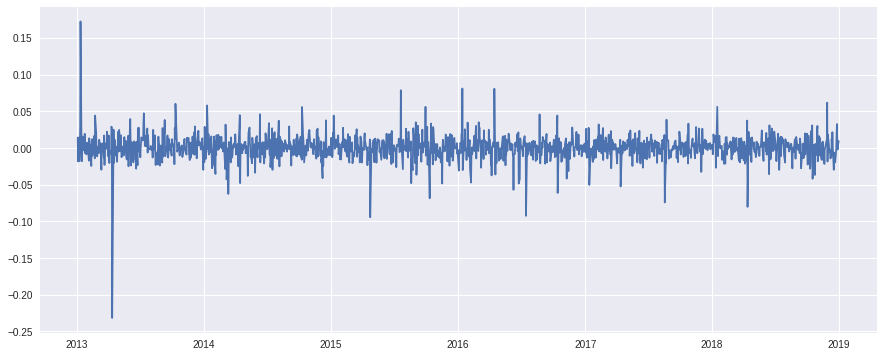

In [33]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


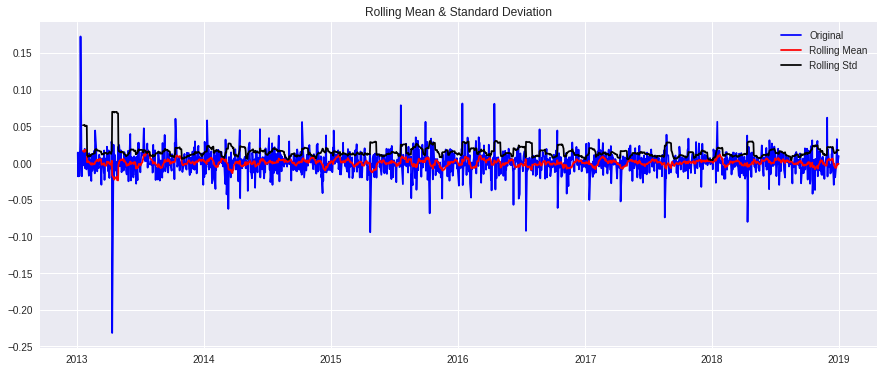

Results of Dickey-Fuller Test:
Test Statistic                  -28.918288
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1507.000000
Critical Value (1%)              -3.434697
Critical Value (5%)              -2.863460
Critical Value (10%)             -2.567792
dtype: float64


In [35]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [51]:
ts_log_diff

Date
2013-01-03    0.014132
2013-01-04   -0.018341
2013-01-07    0.014191
2013-01-08   -0.017947
2013-01-09    0.003756
2013-01-10    0.029322
2013-01-11    0.172413
2013-01-14   -0.005569
2013-01-15   -0.018071
2013-01-16    0.006450
2013-01-17    0.015465
2013-01-18    0.001533
2013-01-22   -0.003838
2013-01-23    0.019233
2013-01-24   -0.007193
2013-01-25    0.000570
2013-01-28   -0.008772
2013-01-29    0.004586
2013-01-30    0.007219
2013-01-31   -0.002084
2013-02-01    0.001895
2013-02-04   -0.017378
2013-02-05    0.013205
2013-02-06    0.005498
2013-02-07   -0.013132
2013-02-08    0.003633
2013-02-11   -0.024540
2013-02-12    0.008376
2013-02-13    0.012147
2013-02-14   -0.010596
                ...   
2018-11-15    0.008611
2018-11-16    0.000000
2018-11-19   -0.004296
2018-11-20   -0.021764
2018-11-21   -0.002203
2018-11-23    0.002203
2018-11-26    0.009852
2018-11-27    0.009756
2018-11-28    0.061703
2018-11-29   -0.018424
2018-11-30    0.018424
2018-12-03    0.004049
2018-1

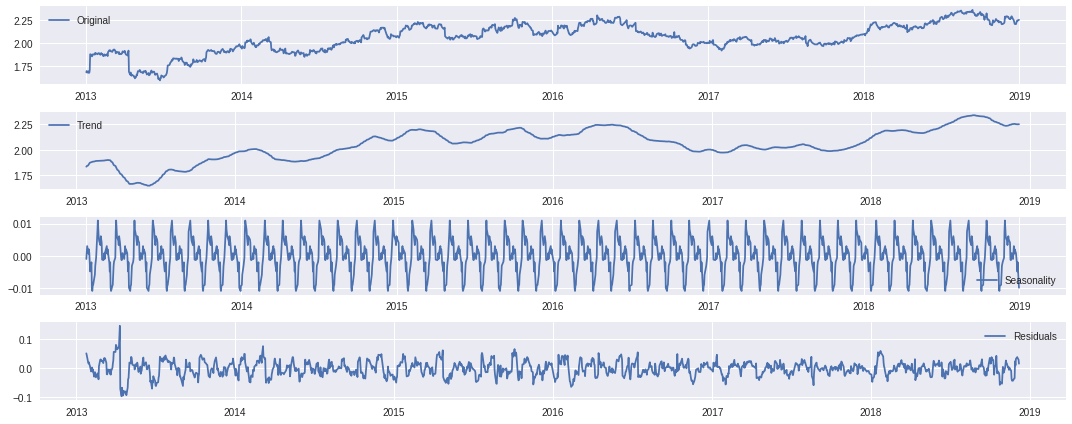

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()